In [86]:
import pandas as pa
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn

In [4]:
red_wine_data = pa.read_csv("winequality-red.csv",delimiter=";")

In [5]:
red_wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [40]:
y = red_wine_data["quality"]

In [41]:
variable_names = list(red_wine_data.columns)[:-1]

In [42]:
X = red_wine_data[variable_names]

In [43]:
X = sm.add_constant(X)

In [44]:
model = sm.OLS(y,X)

In [45]:
results = model.fit()

In [46]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          1.79e-145
Time:                        18:57:34   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652     21.195      1.036      0.300     -19.607      63.538
fixed acidity            0.0250      0.026      0.963      0.336      -0.026       0.076
volatile acidity        -1.0836      0.121     -8.948      0.000      -1.321      -0.846
citric acid             -0.1826      0.147     -1.240      0.215      -0.471       0.106
residual sugar           0.0163      0.015      1.089      0.276      -0.013       0.046
chlorides               -1.8742      0.419     -4.470      0.000      -2.697      -1.052
free sulfur dioxide      0.0044      0.002      2.009      0.045       0.000       0.009
total sulfur dioxide    -0.0033      0.001     -4.480      0.000      -0.005      -0.002
density                -17.8812     21.633     -0.827      0.409     -60.314      24.551
pH                      -0.4137      0.192     -2.159      0.031      -0.789      -0.038
sulphates                0.9163      0.114      8.014      0.000       0.692       1.141
alcohol                  0.2762      0.026     10.429      0.000       0.224       0.328
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
significant_factors = list(results.pvalues[results.pvalues <= 0.05].index)

In [34]:
X_reduc = red_wine_data[significant_factors]

In [36]:
x_model_adj = sm.add_constant(X_reduc)

In [37]:
model_adj = sm.OLS(y,x_model_adj)

In [38]:
results_adj = model_adj.fit()

In [39]:
results_adj.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     127.6
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          5.32e-149
Time:                        18:55:37   Log-Likelihood:                -1570.5
No. Observations:                1599   AIC:                             3157.
Df Residuals:                    1591   BIC:                             3200.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.4301      0.403     10.995      0.000       3.640       5.220
volatile acidity        -1.0128      0.101    -10.043      0.000      -1.211      -0.815
chlorides               -2.0178      0.398     -5.076      0.000      -2.798      -1.238
free sulfur dioxide      0.0051      0.002      2.389      0.017       0.001       0.009
total sulfur dioxide    -0.0035      0.001     -5.070      0.000      -0.005      -0.002
pH                      -0.4827      0.118     -4.106      0.000      -0.713      -0.252
sulphates                0.8827      0.110      8.031      0.000       0.667       1.098
alcohol                  0.2893      0.017     17.225      0.000       0.256       0.322
==============================================================================
Omnibus:                       24.204   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.245
Skew:                          -0.156   Prob(JB):                     2.22e-08
Kurtosis:                       3.657   Cond. No.                     1.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
results_adj.mse_resid

0.4195707473637814

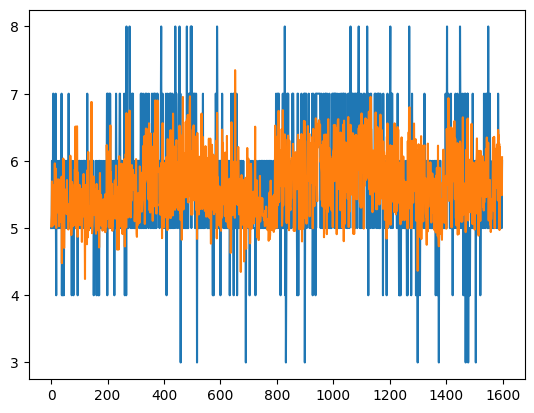

In [69]:
plt.plot(y)
plt.plot(results_adj.fittedvalues)

In [78]:
mse = sum((y - results_adj.fittedvalues) ** 2)/len(diff)

0.4174715816483905

In [81]:
mean = sum(y)/len(y)
cv = mse / mean

(array([  3.,  14.,  30.,  95., 306., 528., 349., 203.,  55.,  16.]),
 array([-2.68918088, -2.21730923, -1.74543757, -1.27356591, -0.80169425,
        -0.3298226 ,  0.14204906,  0.61392072,  1.08579237,  1.55766403,
         2.02953569]),
 <BarContainer object of 10 artists>)

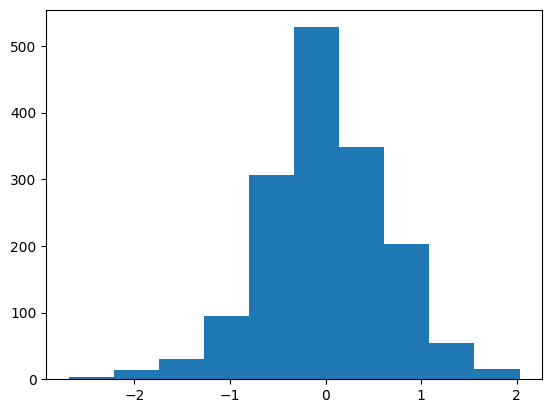

In [85]:
plt.hist(results_adj.resid)

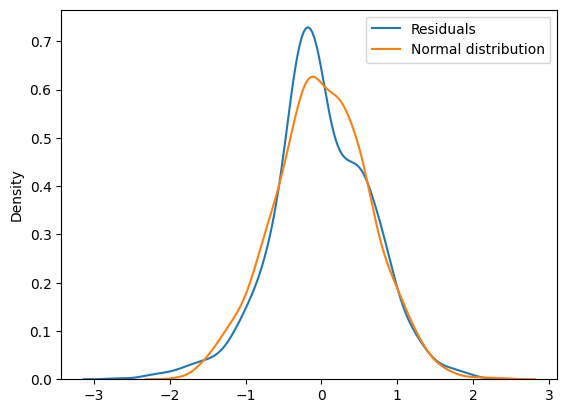

In [95]:
normal_dist = np.random.normal(0,np.std(results_adj.resid),len(results_adj.resid))

fig = sbn.kdeplot(results_adj.resid,label="Residuals")
fig = sbn.kdeplot(normal_dist,label="Normal distribution")
plt.legend()

In [98]:
from statsmodels.stats.diagnostic import het_white

In [100]:
white_test = het_white(results_adj.resid,model_adj.exog)

In [102]:
white_test[1]#p-value

1.3794543308632152e-17

For White test Null Hypotysis is that all the residuals have the same variance

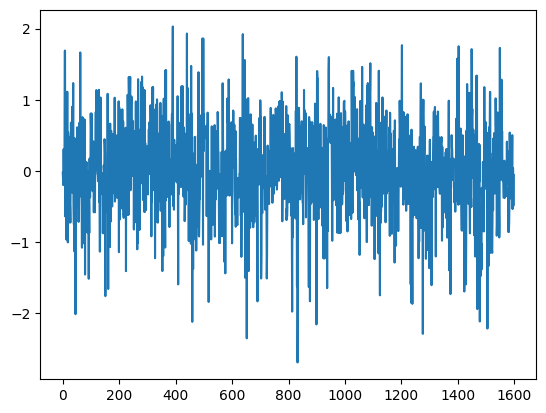

In [103]:
plt.plot(results_adj.resid)

In [104]:
import mysql.connector

In [142]:
connection = mysql.connector.connect(user="root",
                                     password="",
                                     host="localhost",
                                     database="advanced_sql_database")
cursor = connection.cursor()
cursor.execute("INSERT INTO students(name,lastname,age) VALUES ('Emmily','Yan',24)")
# connection.rollback()

cursor.execute("SELECT COUNT(*) FROM students")
results = cursor.fetchall()
count = results[0][0]
if count > 20:
    connection.rollback()
else:
    connection.commit()

#New transaction    
cursor = connection.cursor()
cursor.execute("SELECT COUNT(*) FROM students")
results = cursor.fetchall()
count = results[0][0]
cursor.execute("INSERT INTO students(name,lastname,age) VALUES ('Emmily','Yan',24)")
connection.commit()
connection.close()

In [140]:
count

20

In [144]:
connection = mysql.connector.connect(user="root",
                                     password="",
                                     host="localhost",
                                     database="advanced_sql_database")
cursor = connection.cursor()
cursor.execute("INSERT INTO students(name,lastname,age) VALUES ('Giorgia','Remilly',22)")
# connection.rollback()

cursor.execute("SELECT * FROM students")
results = cursor.fetchall()

In [145]:
results

[(1, 'Melanija', 'Visvaldas', 20),
 (2, 'Melanija', 'Visvaldas', 20),
 (3, 'Inese', 'Luda', 21),
 (4, 'Vilhelms', 'Ivo', 23),
 (5, 'Valentīna', 'Pavele', 20),
 (6, 'Skaistė', 'Milda', 23),
 (7, 'Lina', 'Eimantė', 22),
 (8, 'Vytautas', 'Esteris', 21),
 (9, 'Lynette', 'Shayne', 22),
 (10, 'Blaze', 'McKinley', 21),
 (11, 'Micheal', 'Corinne', 20),
 (12, 'Harry', 'Potter', 20),
 (14, 'Johny', 'Smith', 19),
 (17, 'Yian', 'Jackson', 22),
 (22, 'Taylor', 'Mayson', 20),
 (26, 'Jessica', 'Smith', 20),
 (27, 'Monika', 'Johnson', 21),
 (28, 'Renny', 'McCharthey', 24),
 (29, 'Jan', 'Taylor', 24),
 (30, 'Emma', 'Nikson', 22),
 (38, 'Emmily', 'Yan', 24),
 (42, 'Giorgia', 'Remilly', 22)]

In [146]:
cursor.execute("SELECT * FROM students")
results = cursor.fetchall()

In [147]:
results#the values from parallel session/transaction are not updated

[(1, 'Melanija', 'Visvaldas', 20),
 (2, 'Melanija', 'Visvaldas', 20),
 (3, 'Inese', 'Luda', 21),
 (4, 'Vilhelms', 'Ivo', 23),
 (5, 'Valentīna', 'Pavele', 20),
 (6, 'Skaistė', 'Milda', 23),
 (7, 'Lina', 'Eimantė', 22),
 (8, 'Vytautas', 'Esteris', 21),
 (9, 'Lynette', 'Shayne', 22),
 (10, 'Blaze', 'McKinley', 21),
 (11, 'Micheal', 'Corinne', 20),
 (12, 'Harry', 'Potter', 20),
 (14, 'Johny', 'Smith', 19),
 (17, 'Yian', 'Jackson', 22),
 (22, 'Taylor', 'Mayson', 20),
 (26, 'Jessica', 'Smith', 20),
 (27, 'Monika', 'Johnson', 21),
 (28, 'Renny', 'McCharthey', 24),
 (29, 'Jan', 'Taylor', 24),
 (30, 'Emma', 'Nikson', 22),
 (38, 'Emmily', 'Yan', 24),
 (42, 'Giorgia', 'Remilly', 22)]

In [149]:
connection2 = mysql.connector.connect(user="root",
                                     password="",
                                     host="localhost",
                                     database="advanced_sql_database")
cursor2 = connection2.cursor()
cursor2.execute("SELECT * FROM students")
results2 = cursor2.fetchall()

In [150]:
results2

[(1, 'Melanija', 'Visvaldas', 20),
 (2, 'Melanija', 'Visvaldas', 20),
 (3, 'Inese', 'Luda', 21),
 (4, 'Vilhelms', 'Ivo', 23),
 (5, 'Valentīna', 'Pavele', 20),
 (6, 'Skaistė', 'Milda', 23),
 (7, 'Lina', 'Eimantė', 22),
 (8, 'Vytautas', 'Esteris', 21),
 (9, 'Lynette', 'Shayne', 22),
 (10, 'Blaze', 'McKinley', 21),
 (11, 'Micheal', 'Corinne', 20),
 (12, 'Harry', 'Potter', 20),
 (14, 'Johny', 'Smith', 19),
 (17, 'Yian', 'Jackson', 22),
 (22, 'Taylor', 'Mayson', 20),
 (26, 'Jessica', 'Smith', 20),
 (27, 'Monika', 'Johnson', 21),
 (28, 'Renny', 'McCharthey', 24),
 (29, 'Jan', 'Taylor', 24),
 (30, 'Emma', 'Nikson', 22),
 (38, 'Emmily', 'Yan', 24),
 (43, 'Frederick', 'Van Holf', 20)]

In [152]:
connection.commit()

In [153]:
connection.close()

In [158]:
connection2.close()

In [159]:
connection1 = mysql.connector.connect(user="root",
                                     password="",
                                     host="localhost",
                                     database="advanced_sql_database")


In [160]:
cursor1 = connection1.cursor()

In [161]:
cursor1.execute("INSERT INTO students(name,lastname,age) VALUES ('Lana','Peterson',22)")

In [163]:
connection2 = mysql.connector.connect(user="root",
                                     password="",
                                     host="localhost",
                                     database="advanced_sql_database")
cursor2 = connection2.cursor()

In [165]:
cursor2.execute("SELECT COUNT(*) FROM students WHERE name = 'Lana' AND lastname = 'Peterson' AND age = 22")

InternalError: Unread result found

In [166]:
count_results = cursor2.fetchall()

In [169]:
count = count_results[0][0]

In [170]:
if count > 0:
    connection1.rollback()
else:
    connection1.commit()

In [171]:
connection1.close()
connection2.close()